In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
PROJECT_PATH = '/home/swei20/PIML_v1/'
import sys
sys.path.insert(0, PROJECT_PATH)

In [5]:
import os
import numpy as np

In [5]:
from PIML.gateway.loaderIF.baseloaderIF import SpecGridLoaderIF


In [25]:
GRID_PATH="/datascope/subaru/user/swei20/data/pfsspec/import/stellar/grid"
DATA_PATH=os.path.join(GRID_PATH, "bosz_5000_RHB.h5")

In [26]:
DATA_PARAMS = {"DATA_PATH": DATA_PATH}
OP_PARAMS = {
    "box_name": "R",
    "arm": "RedM",
    "step": 10,
    # "wave_rng": Constants.ARM_RNGS[self.arm]
}

PARAMS = {
    "data": DATA_PARAMS,
    "op"  : OP_PARAMS,
}

In [27]:
MODEL_TYPES = {
            "Resolution": "Alex",
            "Interp": "RBF",
        }

In [28]:
from PIML.gateway.processIF.specgridprocessIF.basespecgridprocessIF import StellarProcessIF

In [29]:
SP = StellarProcessIF()
SP.interact(PARAMS, MODEL_TYPES)


In [30]:
SP.SpecGrid.flux.shape

(2880, 220)

In [32]:
SP.SpecGrid.interpolator

In [33]:
para = SP.SpecGrid.box["mid"]

In [35]:
pmt1 = para

In [38]:
pmt2  = np.copy(para)
pmt2[1] += 250

In [39]:
pmt2

array([-5.00e-01,  6.25e+03,  2.50e+00, -2.50e-01,  0.00e+00])

In [ ]:
    @staticmethod
    def get_fdx_from_pmt(pmt, para):
        mask = True
        for ii, p in enumerate(pmt):
            mask = mask & (para[:,ii] == p)
        try:
            idx = np.where(mask)[0][0]
            return idx
        except:
            raise("No such pmt")

In [ ]:
def test_rbf(self, pmt1, pmt2, pmt=None):
    flux1, flux2 = self.get_model(pmt1,onGrid=1),  self.get_model(pmt2,onGrid=1)
    if pmt is None: pmt = 0.5 * (pmt1 + pmt2)
    interpFlux = self.rbf_flux(pmt)
    plt.plot(self.wave, flux1, label=Util.get_pmt_name(*pmt1), c='k')
    plt.plot(self.wave, interpFlux, label=Util.get_pmt_name(*pmt), c='r')
    plt.plot(self.wave, flux2, label=Util.get_pmt_name(*pmt2), c='b')
    plt.xlabel("Wavelength [A]")
    plt.ylabel("Flux [erg/s/cm2/A]")
    plt.legend()

In [8]:
SGL = SpecGridLoaderIF()
SGL.set_data_path(FILE_PATH)
SpecGrid = SGL.load()

In [96]:
flux0 = np.log(g.get_coord_flux(pmt1))
flux1 = np.log(g.get_coord_flux(pmt2))

In [97]:
wave= g.wave

In [7]:
from PIML.surface.posteval.evalstellarprocess import EvalStellarProcess

In [8]:
ee = EvalStellarProcess()

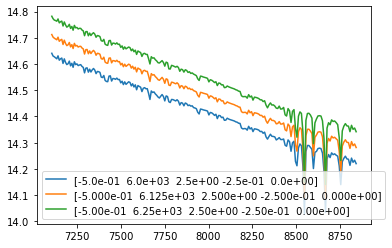

In [9]:
ee.eval_interpolator()

In [13]:
from PIML.crust.model.specgrid.interpspecgridmodel import RBFInterpBuilder, RBFInterpSpecGridModel


In [14]:
ee = EvalStellarProcess()

In [18]:
g = ee.SP.SpecGrid

In [26]:
from PIML.gateway.storerIF.basestorerIF import ObjectStorerIF

In [27]:
STORE_PATH = "/home/swei20/PIML_v1/test/testdata/dnn_test.h5"

In [29]:
storer = ObjectStorerIF()
storer.set_data_path(STORE_PATH)

In [36]:
aa="logflux"

In [40]:
g.__dict__["coord"]

array([[-1.00e+00,  5.50e+03,  2.00e+00, -7.50e-01, -2.50e-01],
       [-1.00e+00,  5.50e+03,  2.00e+00, -7.50e-01,  0.00e+00],
       [-1.00e+00,  5.50e+03,  2.00e+00, -7.50e-01,  2.50e-01],
       ...,
       [ 0.00e+00,  6.75e+03,  3.50e+00,  5.00e-01,  0.00e+00],
       [ 0.00e+00,  6.75e+03,  3.50e+00,  5.00e-01,  2.50e-01],
       [ 0.00e+00,  6.75e+03,  3.50e+00,  5.00e-01,  5.00e-01]])

In [38]:
g.eval(aa)

AttributeError: 'StellarSpecGrid' object has no attribute 'eval'

In [41]:
storer.store_DArgs(g, ["logflux", "coord","box"])

AttributeError: 'dict' object has no attribute 'shape'

In [32]:
g["logflux"]

TypeError: 'StellarSpecGrid' object is not subscriptable

In [20]:
g.flux.shape

(2880, 220)

In [11]:
def get_test_data():
    xgrid = np.mgrid[0:5,0:5]
    coordx = xgrid.reshape(2, -1).T
    value_1D  = xgrid[0].flatten()
    value_2D  = np.tile(value_1D, (2,1)).T
    return coordx, value_2D

In [22]:
a="ahaheojfhha"

In [24]:
a.endswith("ha")

True